# ESO survey planning

We will start by doing the likelihood ratio to $V_{gcr}$ selection in a repeatable way, then taking out the MW disk by hand.

In [12]:
from astropy.table import Table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# MW plot
from astropy import units as u
from mw_plot import MWSkyMap

# Skycoord
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic
from astropy.coordinates import FK5
from astropy.coordinates import ICRS


In [13]:
# set up the plotting
# set font size
plt.rcParams.update({'font.size': 18})
# set the figure size
plt.rcParams.update({'figure.figsize': (10, 7)})
# set the font to latex
plt.rcParams.update({'text.usetex': True})

# plot save directory
plot_dir = '/Users/mncavieres/Documents/2024-2/HVS/Plots/eso_proposal/'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)


In [14]:
# Read in the data
data = Table.read('/Users/mncavieres/Documents/2024-2/HVS/Data/candidates/all_candidates_topcat.fits')

In [15]:
# Read in S5 HVS1 data
s5hvs1 = Table.read('/Users/mncavieres/Documents/2024-2/HVS/Data/candidates/S5HVS1.fits')

In [16]:
# Read in the simulated HVS data
simulated = Table.read('/Users/mncavieres/Documents/2024-2/HVS/Data/speedystar_catalogs/stock_long_corrected.fits')

In [17]:
# select objects that are outside the plane using l and b
candidates = data[(data['b'] > 20) | (data['b'] < -20)]

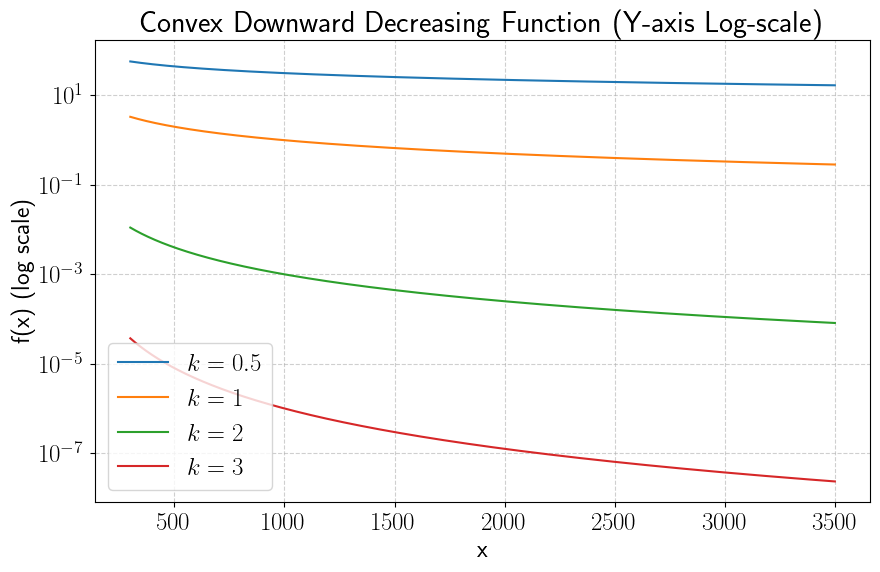

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(300, 3500, 1000)

# Convex downward (concave) decreasing function
def f_convex_down(x, a=1e3, c=0, k=0.5):
    return a / (x + c)**k

# Plot
plt.figure(figsize=(10,6))
k_values = [0.5, 1, 2, 3]
for k in k_values:
    plt.plot(x, f_convex_down(x, k=k), label=f'$k={k}$')
#plt.plot(x, f_convex_down(x), linewidth=2, label=r'$a/(x+c)^k$')

plt.yscale('log')  # Y-axis in log scale
plt.xlabel('x')
plt.ylabel('f(x) (log scale)')
plt.title('Convex Downward Decreasing Function (Y-axis Log-scale)')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()

plt.show()


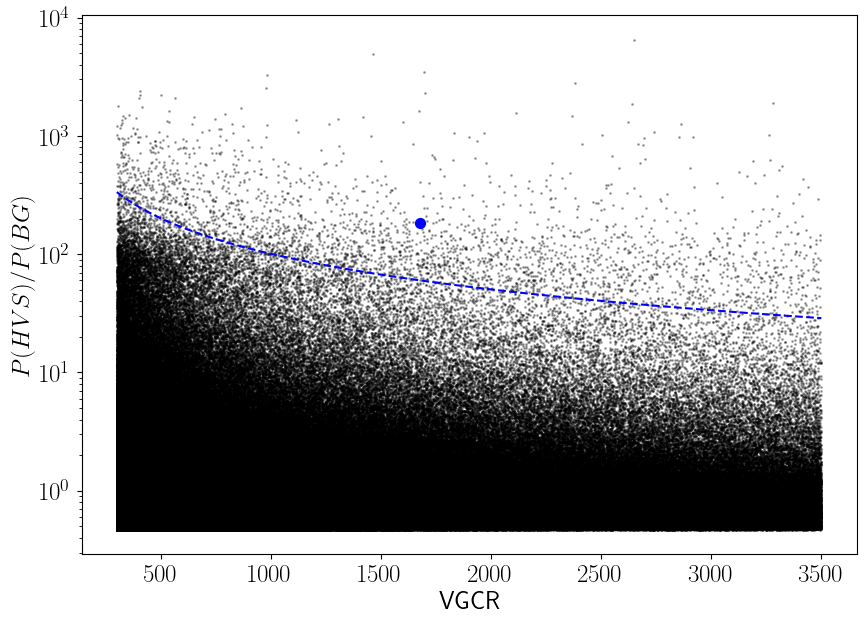

In [19]:
# VGCR vs likelihood ratio
fig, ax = plt.subplots()
ax.scatter(candidates['VGCR'], candidates['p_hvs_over_bg'], c='black', s=1, alpha=0.3)
# plot the S5HVS1
ax.scatter(s5hvs1['VGCR'], s5hvs1['p_hvs_over_bg'], c='blue', s=50, alpha=1)

# show limit on likelihood ratio
#ax.axhline(100, color='red', linestyle='--')

# show a linearly decreasing line in logspace
x = np.linspace(300, 3500, 1000)
y =  f_convex_down(x, a=1e5, c=0, k=0.999)# + 200
ax.plot(x, y, color='blue', linestyle='--')

ax.set_yscale('log')
ax.set_xlabel('VGCR')
ax.set_ylabel('$P(HVS)/P(BG)$')
plt.show()

In [22]:
# selection of HVS candidates
candidates_HL = candidates[candidates['p_hvs_over_bg'] > f_convex_down(candidates['VGCR'], a=2.6e5, c=0, k=0.999)]
print(len(candidates_HL))

756


316


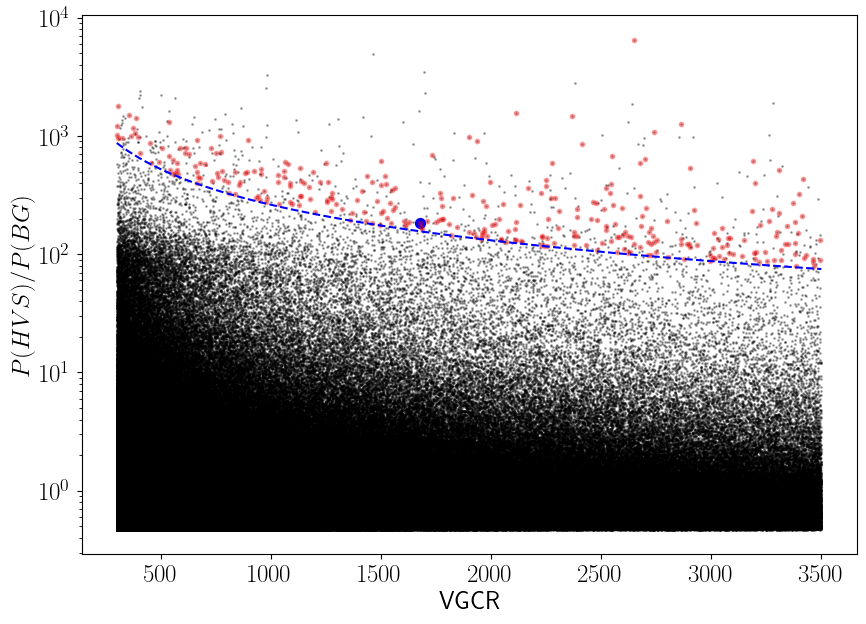

In [23]:
# VGCR vs likelihood ratio
fig, ax = plt.subplots()
ax.scatter(candidates['VGCR'], candidates['p_hvs_over_bg'], c='black', s=1, alpha=0.3)

# plot the S5HVS1
ax.scatter(s5hvs1['VGCR'], s5hvs1['p_hvs_over_bg'], c='blue', s=50, alpha=1)

# show limit on likelihood ratio
#ax.axhline(100, color='red', linestyle='--')
threshold_scale_factor = 2.6e5 # 2.6 to include down to S5HVS1

# selection of HVS candidates
candidates_HL = candidates[candidates['p_hvs_over_bg'] > f_convex_down(candidates['VGCR'], a=threshold_scale_factor, c=0, k=0.999)]
# remove the MW disk
candidates_HL = candidates_HL[(candidates_HL['b'] > 30) | (candidates_HL['b'] < -30)]
print(len(candidates_HL))

# selection
ax.scatter(candidates_HL['VGCR'], candidates_HL['p_hvs_over_bg'], c='red', s=10, alpha=0.3)

# show a linearly decreasing line in logspace
x = np.linspace(300, 3500, 1000)
y =  f_convex_down(x, a=threshold_scale_factor, c=0, k=0.999)# + 200
ax.plot(x, y, color='blue', linestyle='--')

ax.set_yscale('log')
ax.set_xlabel('VGCR')
ax.set_ylabel('$P(HVS)/P(BG)$')
plt.savefig(plot_dir + 'VGCR_vs_likelihood_ratio.png', dpi=300)
plt.show()

# Color dependant probability limit


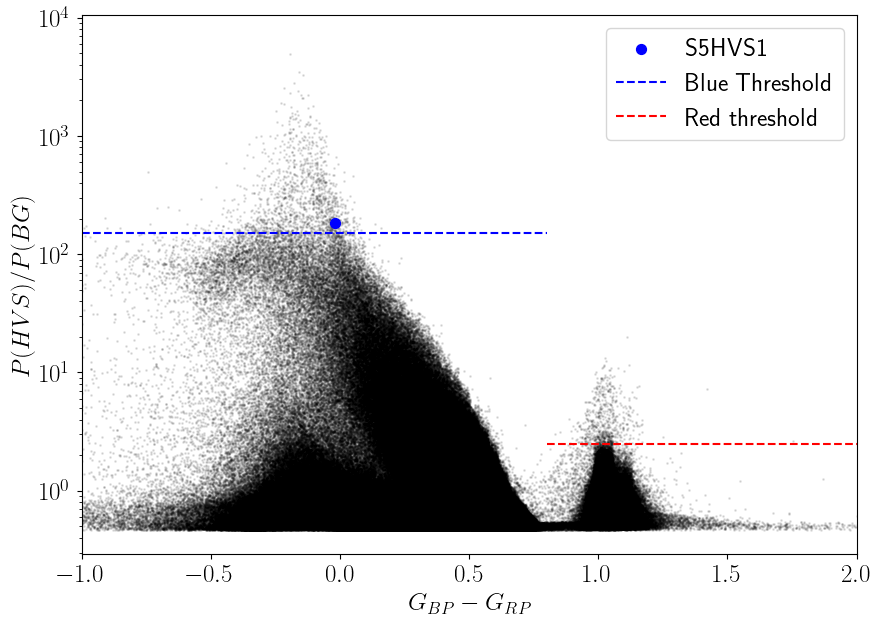

In [24]:
# plot bp_rp vs p_hvs_over_bg
fig, ax = plt.subplots()
ax.scatter(candidates['bp_rp_corr'], candidates['p_hvs_over_bg'], c='black', s=1, alpha=0.1)
# plot the S5HVS1
ax.scatter(s5hvs1['bp_rp_corr'], s5hvs1['p_hvs_over_bg'], c='blue', s=50, alpha=1, label='S5HVS1')

# show limit on likelihood ratio
ax.axhline(150, color='blue', linestyle='--', label='Blue Threshold', xmax=0.6)
ax.axhline(2.5, color='red', linestyle='--', xmin= 0.6, xmax=1, label='Red threshold')
ax.set_yscale('log')
ax.set_xlabel('$G_{BP}-G_{RP}$')
ax.set_ylabel('$P(HVS)/P(BG)$')
ax.set_xlim(-1, 2)
ax.legend()
plt.savefig(plot_dir + 'bp_rp_vs_likelihood_ratio.png', dpi=300)

plt.show()

## Split stars between blue and red

In [25]:
# split the candidates in blue and red
candidates_blue = candidates[candidates['bp_rp_corr'] < 0.5] 
candidates_red = candidates[candidates['bp_rp_corr'] > 0.7]

# remove the MW disk
candidates_blue = candidates_blue[(candidates_blue['b'] > 30) | (candidates_blue['b'] < -30)]
candidates_red = candidates_red[(candidates_red['b'] > 30) | (candidates_red['b'] < -30)]

# remove sources close to the LMC and SMC
lmc_skycoord = SkyCoord(ra=80.89416667*u.deg, dec=-69.75611111*u.deg, frame='icrs')
smc_skycoord = SkyCoord(ra=13.18666667*u.deg, dec=-72.82861111*u.deg, frame='icrs')

# define 
candidates_blue_skycoord = SkyCoord(ra=candidates_blue['ra']*u.deg, dec=candidates_blue['dec']*u.deg, frame='icrs')
candidates_red_skycoord = SkyCoord(ra=candidates_red['ra']*u.deg, dec=candidates_red['dec']*u.deg, frame='icrs')

# compute the angular separation
sep_lmc_blue = candidates_blue_skycoord.separation(lmc_skycoord)
sep_smc_blue = candidates_blue_skycoord.separation(smc_skycoord)
sep_lmc_red = candidates_red_skycoord.separation(lmc_skycoord)
sep_smc_red = candidates_red_skycoord.separation(smc_skycoord)

# remove sources close to the LMC and SMC
candidates_blue = candidates_blue[(sep_lmc_blue > 10*u.deg) & (sep_smc_blue > 5*u.deg)]
candidates_red = candidates_red[(sep_lmc_red > 10*u.deg) & (sep_smc_red > 5*u.deg)]

# select the high likelihood candidates
candidates_HL_blue = candidates_blue[candidates_blue['p_hvs_over_bg'] > 150]
candidates_HL_red = candidates_red[candidates_red['p_hvs_over_bg'] > 2.5]

# select those that are observable from the south
candidates_HL_blue = candidates_HL_blue[candidates_HL_blue['dec'] < 0]
candidates_HL_red = candidates_HL_red[candidates_HL_red['dec'] < 0]

print(len(candidates_HL_blue))
print(len(candidates_HL_red))


424
76


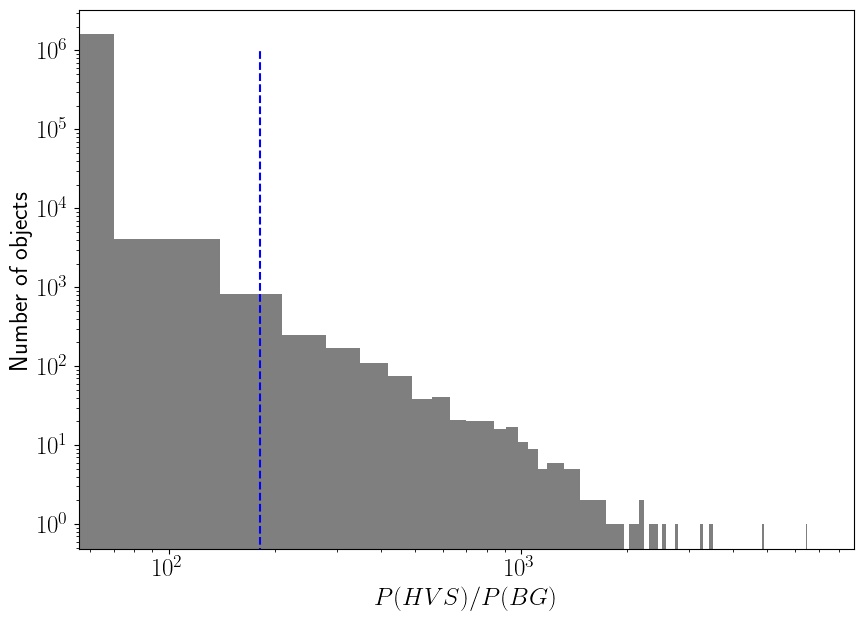

In [13]:
# histogram of p_hvs_over_bg
fig, ax = plt.subplots()
ax.hist(candidates['p_hvs_over_bg'][candidates['p_hvs_over_bg']<1e9], bins=100, color='black', alpha=0.5, range=(0, 7000), log=True)
ax.vlines(s5hvs1['p_hvs_over_bg'], 0, 1e6, color='blue', linestyle='--')
#ax.hist(candidates_HL['p_hvs_over_bg'], bins=100, color='red', alpha=0.5)
ax.set_xscale('log')
ax.set_xlabel('$P(HVS)/P(BG)$')
ax.set_ylabel('Number of objects')
plt.show()

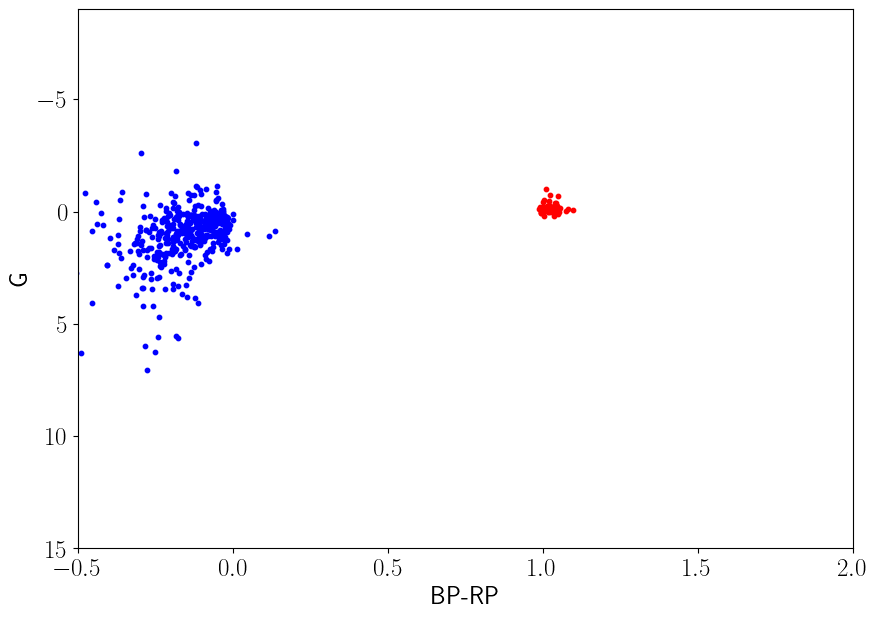

In [15]:
from matplotlib.colors import LogNorm

# selection of HVS candidates
#candidates_HL = candidates[candidates['p_hvs_over_bg'] > f_convex_down(candidates['VGCR'], a=threshold_scale_factor, c=0, k=0.999)]
#candidates_HL = candidates[candidates['p_hvs_over_bg'] > 130]
# remove the MW disk
#candidates_HL = candidates_HL[(candidates_HL['b'] > 20) | (candidates_HL['b'] < -20)]
#print(len(candidates_HL))

# plot CMD
fig, ax = plt.subplots()
#bg_s = ax.scatter(candidates['bp_rp_corr'], candidates['implied_M_g_corr'], c=candidates['p_hvs_over_bg'], s=1, alpha=0.3, cmap='viridis', norm=LogNorm(vmin=1, vmax=1000))
ax.scatter(candidates_HL_blue['bp_rp_corr'], candidates_HL_blue['implied_M_g_corr'], c='blue', s=10, alpha=1)
ax.scatter(candidates_HL_red['bp_rp_corr'], candidates_HL_red['implied_M_g_corr'], c='red', s=10, alpha=1)

plt.gca().invert_yaxis()
ax.set_xlabel('BP-RP')
ax.set_ylabel('G')
ax.set_xlim(-0.5, 2)
ax.set_ylim(15, -9)
#plt.colorbar(bg_s, label='$P(HVS)/P(BG)$')
plt.show()

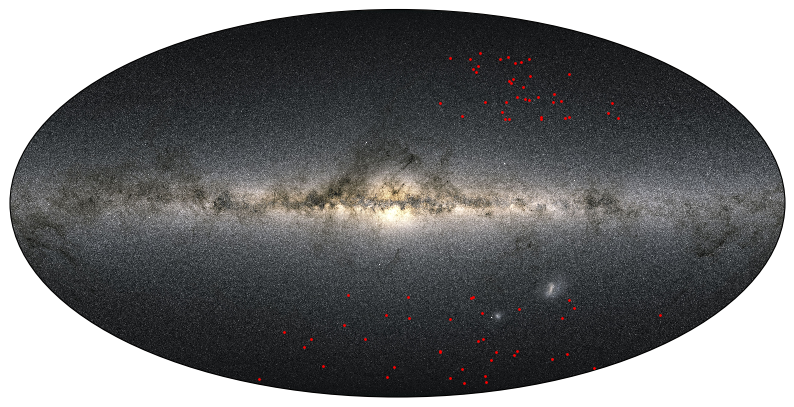

In [259]:
# mollwide plot
#fig, ax = plt.subplots(figsize=(10, 7))
m = MWSkyMap(projection='mollweide', figsize=(10, 7))
#m.scatter(candidates_HL_blue['ra']*u.deg, candidates_HL_blue['dec']*u.deg, s=1, c='blue', alpha=1)
m.scatter(candidates_HL_red['ra']*u.deg, candidates_HL_red['dec']*u.deg, s=1, c='red', alpha=1)
#m.scatter(s5hvs1['l'], s5hvs1['b'], s=50, c='blue', alpha=1)
plt.savefig(os.path.join(plot_dir,'HVS_candidates_mollwide_red.png'), dpi=300)
plt.show()


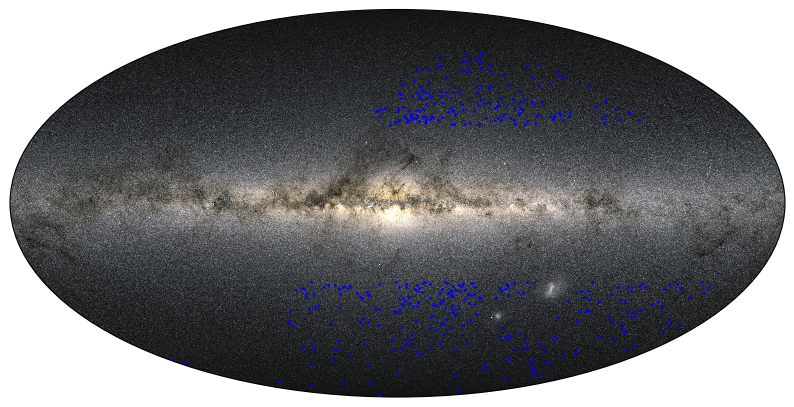

In [263]:
# mollwide plot
#fig, ax = plt.subplots(figsize=(10, 7))
m = MWSkyMap(projection='mollweide', figsize=(10, 7))
m.scatter(candidates_HL_blue['ra']*u.deg, candidates_HL_blue['dec']*u.deg, s=1, c='blue', alpha=1)
#m.scatter(candidates_HL_red['ra']*u.deg, candidates_HL_red['dec']*u.deg, s=1, c='red', alpha=1)
#m.scatter(s5hvs1['l'], s5hvs1['b'], s=50, c='blue', alpha=1)
plt.savefig(os.path.join('HVS_candidates_mollwide_blue.png'), dpi=300)
plt.show()


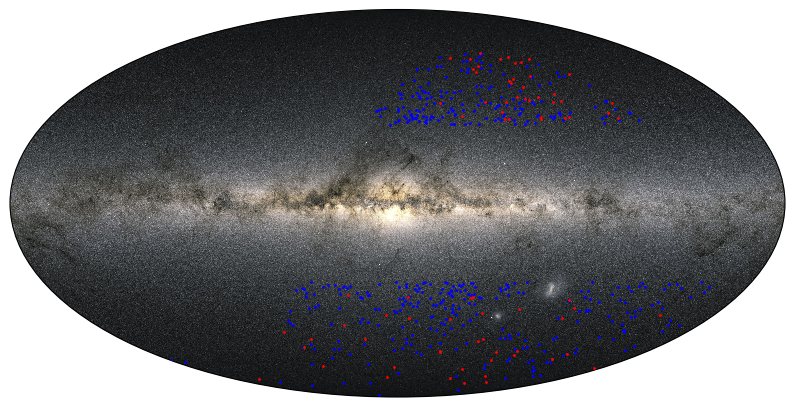

In [16]:

m = MWSkyMap(projection='mollweide', figsize=(10, 7))
m.scatter(candidates_HL_blue['ra']*u.deg, candidates_HL_blue['dec']*u.deg, s=1, c='blue', alpha=1)
m.scatter(candidates_HL_red['ra']*u.deg, candidates_HL_red['dec']*u.deg, s=1, c='red', alpha=1)
#m.scatter(s5hvs1['ra']*u.deg, s5hvs1['dec']*u.deg, s=50, c='yellow', alpha=1, label='S5-HVS1')
#plt.legend()
plt.savefig(os.path.join('HVS_candidates_mollwide_both.png'), dpi=300)
plt.show()


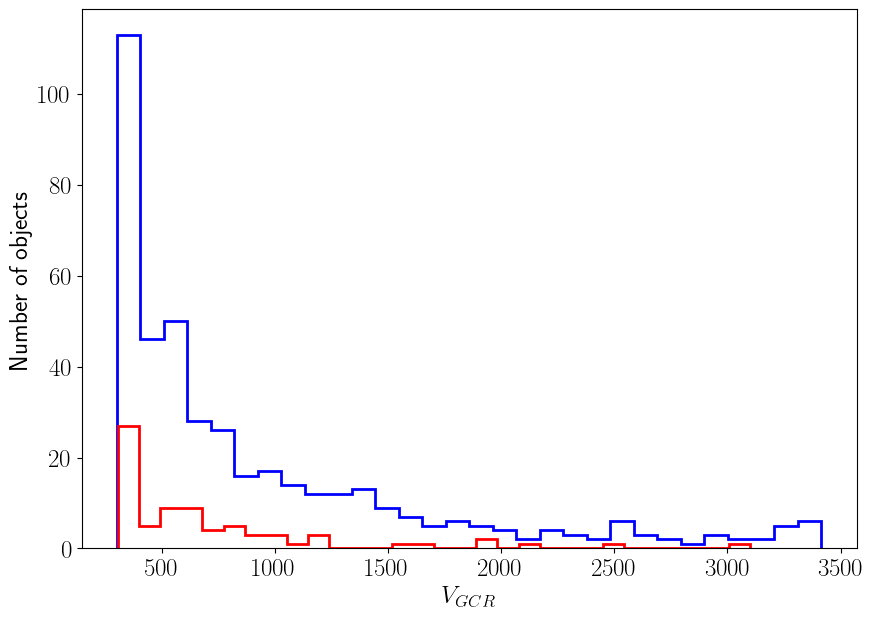

In [257]:
# VGCR histogram

fig, ax = plt.subplots()
ax.hist(candidates_HL_blue['VGCR'], bins=30, color='blue', histtype='step', linewidth=2)
#ax.hist(s5hvs1['VGCR'], bins=100, color='blue', histtype='step', linewidth=2)
ax.hist(candidates_HL_red['VGCR'], bins=30, color='red', histtype='step', linewidth=2)
ax.set_xlabel('$V_{GCR}$')
ax.set_ylabel('Number of objects')
plt.show()

In [17]:
print(len(candidates_HL_blue))
print(len(candidates_HL_red))

424
76


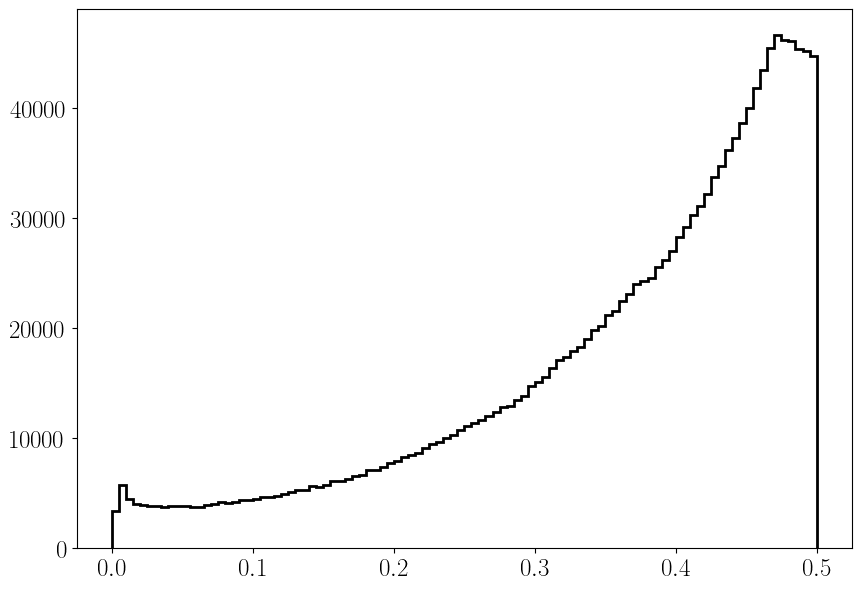

In [149]:
# VGCR histogram

fig, ax = plt.subplots()
ax.hist(candidates['p_background'], bins=100, color='black', histtype='step', linewidth=2)
#ax.hist(s5hvs1['VGCR'], bins=100, color='blue', histtype='step', linewidth=2)
plt.show()

# Clean it further

In [20]:
# save the candidates
candidates_HL_blue.write('/Users/mncavieres/Documents/2024-2/HVS/Data/candidates/candidates_HL_blue.fits', overwrite=True)
candidates_HL_red.write('/Users/mncavieres/Documents/2024-2/HVS/Data/candidates/candidates_HL_red.fits', overwrite=True)

In [38]:
print(len(candidates_HL_blue)+ len(candidates_HL_red))

500


## Are they in Gaia RVs?

In [21]:
# load catalog with Gaia rv
gaia_rv = Table.read('/Users/mncavieres/Documents/2024-2/HVS/Data/candidates/candidates_HL_purplexgaiarv.fits')

In [ ]:
# see how many sources have rv
print(len(gaia_rv[~np.isnan(gaia_rv['RV'])]))
# remove those from the catalog
candidates_purple = gaia_rv[np.isnan(gaia_rv['RV'])]

# now the catalog is cleared of stars with Gaia RVs

## Are they in LAMOST

In [29]:
# load LAMOST DR9 low resolution catalog
lamost_lr = Table.read('/Users/mncavieres/Documents/2024-2/HVS/Data/LAMOST/dr9_v2.0_LRS_stellar.fits')
lamost_mr = Table.read('/Users/mncavieres/Documents/2024-2/HVS/Data/LAMOST/dr9_v2.0_MRS_stellar.fits')

In [35]:
# crossmatch catalog with LAMOST
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table
from astropy.coordinates import match_coordinates_sky

# define the skycoord for the candidates
candidates_skycoord = SkyCoord(ra=candidates_purple['ra']*u.deg, dec=candidates_purple['dec']*u.deg)
lamost_lr_skycoord = SkyCoord(ra=lamost_lr['ra'], dec=lamost_lr['dec'])
lamost_mr_skycoord = SkyCoord(ra=lamost_mr['ra'], dec=lamost_mr['dec'])

# crossmatch
idx, d2d, _ = match_coordinates_sky(candidates_skycoord, lamost_lr_skycoord)
idx_mr, d2d_mr, _ = match_coordinates_sky(candidates_skycoord, lamost_mr_skycoord)

# select those that are within 1 arcsec
mask = d2d < 1*u.arcsec
mask_mr = d2d_mr < 1*u.arcsec

# select the LAMOST sources
candidates_lamost_lr = candidates_purple[mask]
candidates_lamost_mr = candidates_purple[mask_mr]

# save the catalogs
candidates_lamost_lr.write('/Users/mncavieres/Documents/2024-2/HVS/Data/candidates/candidates_HL_lamost_lr.fits', overwrite=True)
candidates_lamost_mr.write('/Users/mncavieres/Documents/2024-2/HVS/Data/candidates/candidates_HL_lamost_mr.fits', overwrite=True)

# remove sources that are in those catalogs from the main purple catalog
candidates_purple = candidates_purple[~mask]
candidates_purple = candidates_purple[~mask_mr]

In [37]:
candidates_purple

<Table length=492>
     SOURCE_ID              l          ... RADEcorJ2000 angDist
                                       ...               arcsec
       int64             float64       ...   float32    float64
------------------- ------------------ ... ------------ -------
6501185622502129664  329.2892462888906 ...      -0.1859     0.0
3521740592785875328  292.9742415648694 ...      -0.3258     0.0
5049869547018221824 238.83453079366396 ...      -0.3473     0.0
6408821251290215808 329.74981304086015 ...      -0.3628     0.0
6371926623223666176  321.0291969394116 ...      -0.1531     0.0
3549480240362620416  271.2138008982867 ...       0.0156     0.0
3559421302946032128  270.4937220116071 ...      -0.2023     0.0
2608910543163383168  55.94859857666796 ...       0.1361     0.0
3501668694487973760   301.118517475521 ...      -0.2673     0.0
                ...                ... ...          ...     ...
6358083668750068736  315.4126642415323 ...      -0.2205     0.0
6861454763554082176  27.36743442352902 ...       0.7377     0.0
2974702084447511680  222.0119742885147 ...       0.0271     0.0
6670423620479597824  349.9041236044042 ...      -0.3473     0.0
2379120133445644288 24.809832263907435 ...       0.5622     0.0
2680359798033138688  59.75256883829531 ...      -0.0086     0.0
3487206100788576000 287.23405122287903 ...      -0.4389     0.0
6372697964989800192 320.03757720921493 ...       0.2069     0.0
2975230296705901568 221.40195673679668 ...      -0.1937     0.0

# Color - Speed selection

This means applying the color selection first, then using the previous speed dependent selection

In [116]:
# split the candidates in blue and red
candidates_blue = candidates[candidates['bp_rp_corr'] < 0.5] 
candidates_red = candidates[candidates['bp_rp_corr'] > 0.7]

# remove the MW disk
candidates_blue = candidates_blue[(candidates_blue['b'] > 20) | (candidates_blue['b'] < -20)]
candidates_red = candidates_red[(candidates_red['b'] > 20) | (candidates_red['b'] < -20)]

# remove sources close to the LMC and SMC
lmc_skycoord = SkyCoord(ra=80.89416667*u.deg, dec=-69.75611111*u.deg, frame='icrs')
smc_skycoord = SkyCoord(ra=13.18666667*u.deg, dec=-72.82861111*u.deg, frame='icrs')

# define 
candidates_blue_skycoord = SkyCoord(ra=candidates_blue['ra']*u.deg, dec=candidates_blue['dec']*u.deg, frame='icrs')
candidates_red_skycoord = SkyCoord(ra=candidates_red['ra']*u.deg, dec=candidates_red['dec']*u.deg, frame='icrs')

# compute the angular separation
sep_lmc_blue = candidates_blue_skycoord.separation(lmc_skycoord)
sep_smc_blue = candidates_blue_skycoord.separation(smc_skycoord)
sep_lmc_red = candidates_red_skycoord.separation(lmc_skycoord)
sep_smc_red = candidates_red_skycoord.separation(smc_skycoord)

# remove sources close to the LMC and SMC
candidates_blue = candidates_blue[(sep_lmc_blue > 10*u.deg) & (sep_smc_blue > 5*u.deg)]
candidates_red = candidates_red[(sep_lmc_red > 10*u.deg) & (sep_smc_red > 5*u.deg)]

# select the high likelihood candidates
#candidates_HL_blue = candidates_blue[candidates_blue['p_hvs_over_bg'] > 150]
#candidates_HL_red = candidates_red[candidates_red['p_hvs_over_bg'] > 2.5]

# select those that are observable from the south
#candidates_HL_blue = candidates_HL_blue[candidates_HL_blue['dec'] < 0]
#candidates_HL_red = candidates_HL_red[candidates_HL_red['dec'] < 0]

#print(len(candidates_HL_blue))
#print(len(candidates_HL_red))


[ True]
589


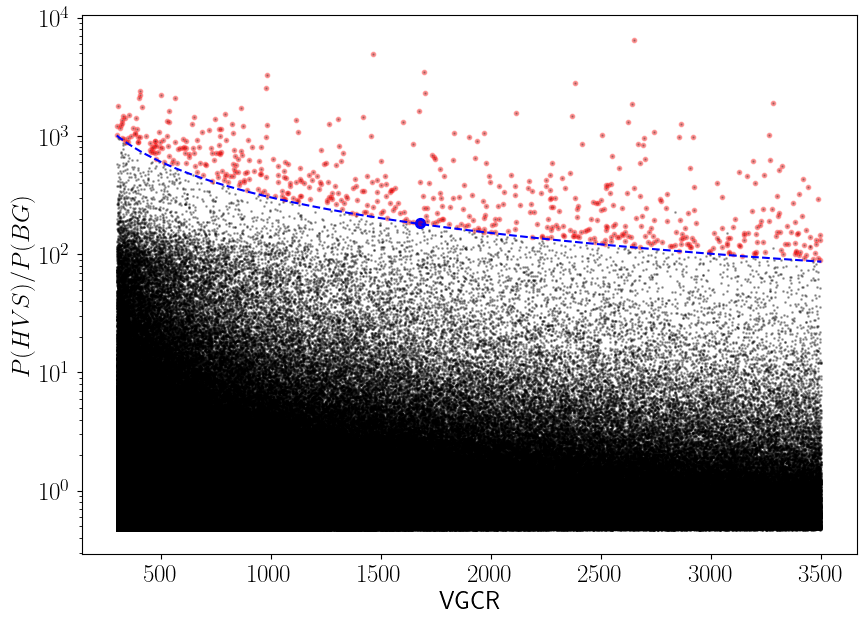

In [117]:
# VGCR vs likelihood ratio
fig, ax = plt.subplots()
ax.scatter(candidates['VGCR'], candidates['p_hvs_over_bg'], c='black', s=1, alpha=0.3)

# plot the S5HVS1
ax.scatter(s5hvs1['VGCR'], s5hvs1['p_hvs_over_bg'], c='blue', s=50, alpha=1)

# show limit on likelihood ratio
#ax.axhline(100, color='red', linestyle='--')
threshold_scale_factor = 3e5 # 2.6 to include down to S5HVS1

# selection of HVS candidates
candidates_HL = candidates_blue[candidates_blue['p_hvs_over_bg'] > f_convex_down(candidates_blue['VGCR'], a=threshold_scale_factor, c=0, k=0.999)]
print(s5hvs1['p_hvs_over_bg'] > f_convex_down(s5hvs1['VGCR'], a=threshold_scale_factor, c=0, k=0.999))
# remove the MW disk
#candidates_HL = candidates_blue[(candidates_HL['b'] > 30) | (candidates_HL['b'] < -30)]
print(len(candidates_HL))

# selection
ax.scatter(candidates_HL['VGCR'], candidates_HL['p_hvs_over_bg'], c='red', s=10, alpha=0.3)

# show a linearly decreasing line in logspace
x = np.linspace(300, 3500, 1000)
y =  f_convex_down(x, a=threshold_scale_factor, c=0, k=0.999)# + 200
ax.plot(x, y, color='blue', linestyle='--')

ax.set_yscale('log')
ax.set_xlabel('VGCR')
ax.set_ylabel('$P(HVS)/P(BG)$')
plt.savefig(plot_dir + 'VGCR_vs_likelihood_ratio_BLUE.png', dpi=300)
plt.show()
candidates_HL_blue = candidates_HL

158


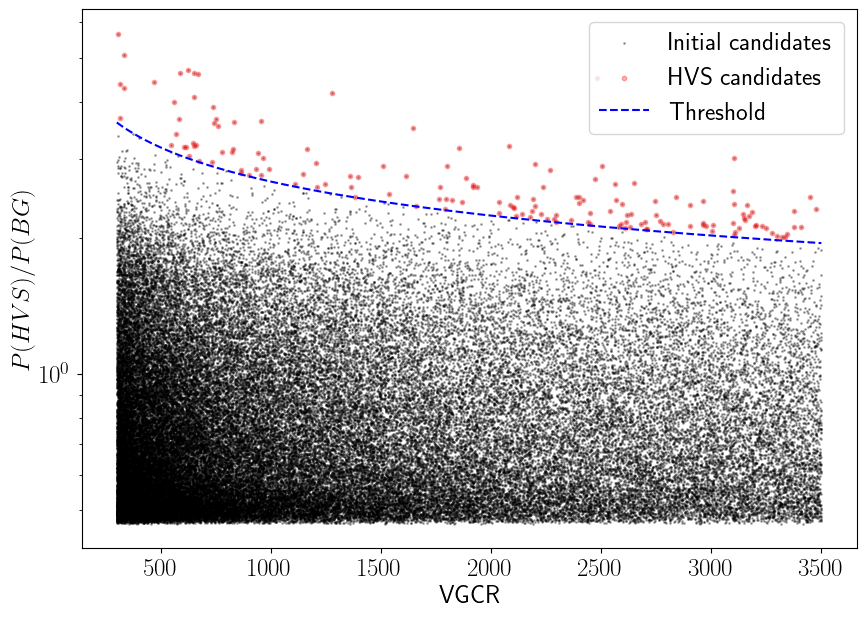

In [118]:
# VGCR vs likelihood ratio
fig, ax = plt.subplots()
ax.scatter(candidates_red['VGCR'], candidates_red['p_hvs_over_bg'], c='black', s=1, alpha=0.3, label='Initial candidates')

# plot the S5HVS1
#ax.scatter(s5hvs1['VGCR'], s5hvs1['p_hvs_over_bg'], c='blue', s=50, alpha=1, label='S5HVS1')

# show limit on likelihood ratio
#ax.axhline(100, color='red', linestyle='--')
threshold_scale_factor = 1.5e1 # 2.6 to include down to S5HVS1

k_sel = 0.25

# selection of HVS candidates
candidates_HL = candidates_red[candidates_red['p_hvs_over_bg'] > f_convex_down(candidates_red['VGCR'], a=threshold_scale_factor, c=0, k=k_sel)]
# remove the MW disk
#candidates_HL = candidates_blue[(candidates_HL['b'] > 30) | (candidates_HL['b'] < -30)]
print(len(candidates_HL))

# selection
ax.scatter(candidates_HL['VGCR'], candidates_HL['p_hvs_over_bg'], c='red', s=10, alpha=0.3, label='HVS candidates')

# show a linearly decreasing line in logspace
x = np.linspace(300, 3500, 1000)
y =  f_convex_down(x, a=threshold_scale_factor, c=0, k=k_sel)# + 200
ax.plot(x, y, color='blue', linestyle='--', label='Threshold')

ax.set_yscale('log')
ax.set_xlabel('VGCR')
ax.set_ylabel('$P(HVS)/P(BG)$')
plt.legend()
plt.savefig(plot_dir + 'VGCR_vs_likelihood_ratio_RED.png', dpi=300)
plt.show()
candidates_HL_red = candidates_HL

In [119]:
from astropy.table import vstack
# save the catalogs
candidates_HL_red.write('/Users/mncavieres/Documents/2024-2/HVS/Data/candidates/candidates_HL_red_disk.fits', overwrite=True)
candidates_HL_blue.write('/Users/mncavieres/Documents/2024-2/HVS/Data/candidates/candidates_HL_blue_disk.fits', overwrite=True)

# merge the catalogs
candidates_HL_purple = vstack([candidates_HL_red, candidates_HL_blue])

In [120]:
# crossmatch catalog with LAMOST
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table
from astropy.coordinates import match_coordinates_sky

# define the skycoord for the candidates
candidates_skycoord = SkyCoord(ra=candidates_HL_purple['ra']*u.deg, dec=candidates_HL_purple['dec']*u.deg)
lamost_lr_skycoord = SkyCoord(ra=lamost_lr['ra'], dec=lamost_lr['dec'])
lamost_mr_skycoord = SkyCoord(ra=lamost_mr['ra'], dec=lamost_mr['dec'])

# crossmatch
idx, d2d, _ = match_coordinates_sky(candidates_skycoord, lamost_lr_skycoord)
idx_mr, d2d_mr, _ = match_coordinates_sky(candidates_skycoord, lamost_mr_skycoord)

# select those that are within 1 arcsec
mask = d2d < 1*u.arcsec
mask_mr = d2d_mr < 1*u.arcsec

# select the LAMOST sources
candidates_lamost_lr = candidates_HL_purple[mask]
candidates_lamost_mr = candidates_HL_purple[mask_mr]

# save the catalogs
candidates_lamost_lr.write('/Users/mncavieres/Documents/2024-2/HVS/Data/candidates/candidates_HL_lamost_lr.fits', overwrite=True)
candidates_lamost_mr.write('/Users/mncavieres/Documents/2024-2/HVS/Data/candidates/candidates_HL_lamost_mr.fits', overwrite=True)

# remove sources that are in those catalogs from the main purple catalog
candidates_purple = candidates_HL_purple[(~mask)|(~mask_mr)]


In [121]:
# crossmatch with Gaia RV to remove every star with a RV measurement
from astroquery.gaia import Gaia


# crossmatch with Gaia
candidates_skycoord = SkyCoord(ra=candidates_purple['ra']*u.deg, dec=candidates_purple['dec']*u.deg)
query = f"""
SELECT source_id, radial_velocity, ra, dec
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(
    POINT('ICRS', ra, dec),
    CIRCLE('ICRS', {candidates_purple['ra'].mean()}, {candidates_purple['dec'].mean()}, 1/3600)
)
"""
job = Gaia.launch_job_async(query)
rv_gaia = job.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


In [122]:
candidates_purple.write('/Users/mncavieres/Documents/2024-2/HVS/Data/candidates/candidates_HL_purple_disk.fits', overwrite=True)

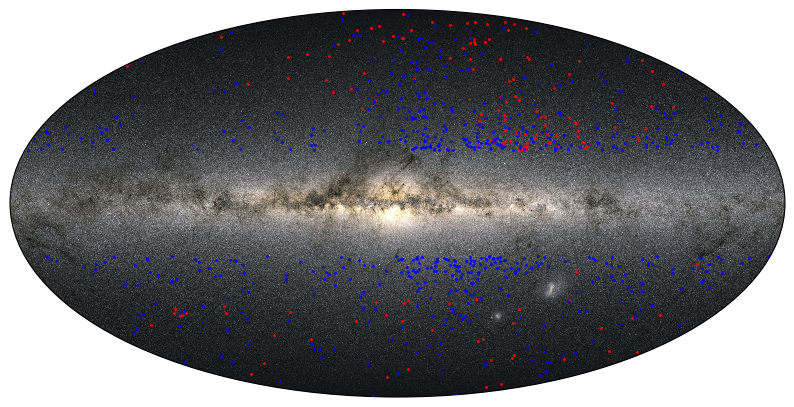

In [123]:
# mollwide plot of sources
m = MWSkyMap(projection='mollweide', figsize=(10, 7))
#m.scatter(candidates_purple['ra']*u.deg, candidates_purple['dec']*u.deg, s=1, c='black', alpha=1)#
m.scatter(candidates_HL_red['ra']*u.deg, candidates_HL_red['dec']*u.deg, s=1, c='red', alpha=1)
m.scatter(candidates_HL_blue['ra']*u.deg, candidates_HL_blue['dec']*u.deg, s=1, c='blue', alpha=1)
plt.savefig(os.path.join('HVS_candidates_mollwide_purple_disk.png'), dpi=300)
plt.show()

In [129]:
# sect sources observable from the south in november, ie., dec < 0 and -60 < ra < 140
candidates_purple_south = candidates_purple[(candidates_purple['dec'] < 0) & (candidates_purple['ra'] > -60) & (candidates_purple['ra'] < 140)]
candidates_HL_blue_south = candidates_HL_blue[(candidates_HL_blue['dec'] < 0) & (candidates_HL_blue['ra'] > -60) & (candidates_HL_blue['ra'] < 140)]
candidates_HL_red_south = candidates_HL_red[(candidates_HL_red['dec'] < 0) & (candidates_HL_red['ra'] > -60) & (candidates_HL_red['ra'] < 140)]

In [130]:
print(len(candidates_purple_south))

114


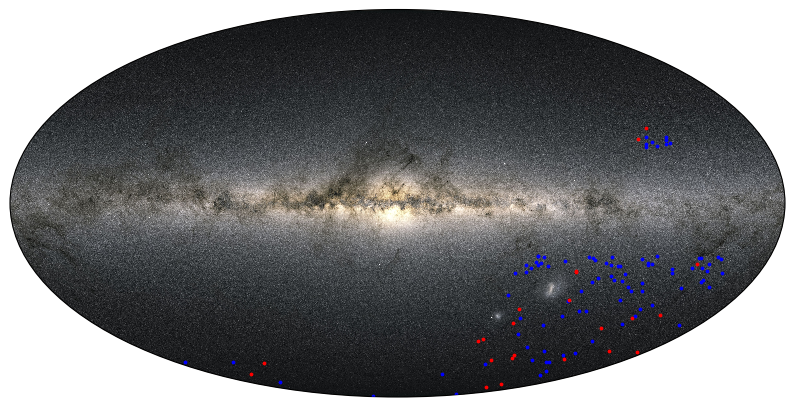

In [132]:
# plot candidates south
m = MWSkyMap(projection='mollweide', figsize=(10, 7))
#m.scatter(candidates_purple_south['ra']*u.deg, candidates_purple_south['dec']*u.deg, s=1, c='black', alpha=1)
m.scatter(candidates_HL_blue_south['ra']*u.deg, candidates_HL_blue_south['dec']*u.deg, s=3, c='blue', alpha=1)
m.scatter(candidates_HL_red_south['ra']*u.deg, candidates_HL_red_south['dec']*u.deg, s=3, c='red', alpha=1)
plt.savefig(os.path.join('HVS_candidates_mollwide_purple_disk_south_nov.png'), dpi=300)
plt.show()


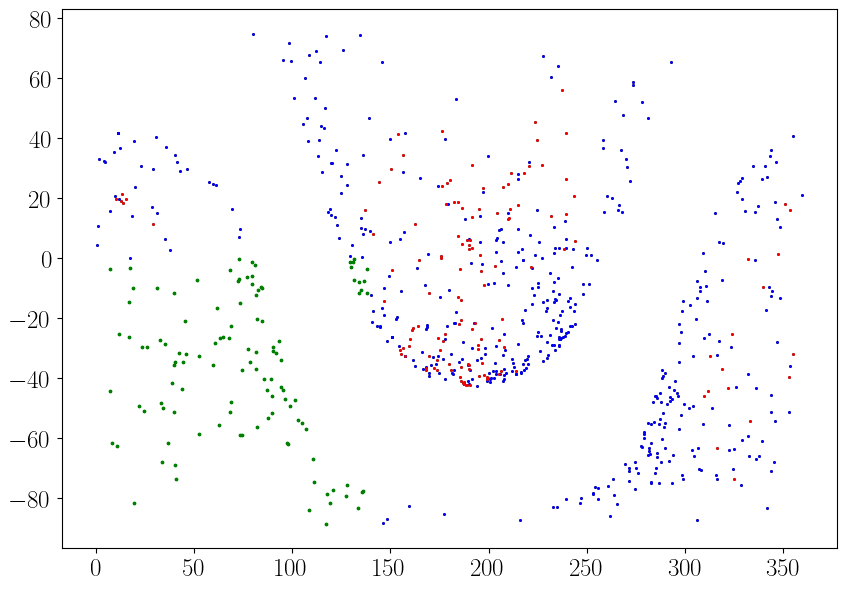

In [140]:
# now a regular mollwide plot showing the ones in the south, the ones in the north and the ones that match november and those that don't
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(candidates_purple['ra']*u.deg, candidates_purple['dec']*u.deg, s=1, c='black', alpha=1)
ax.scatter(candidates_HL_blue['ra']*u.deg, candidates_HL_blue['dec']*u.deg, s=1, c='blue', alpha=1)
ax.scatter(candidates_HL_red['ra']*u.deg, candidates_HL_red['dec']*u.deg, s=1, c='red', alpha=1)
ax.scatter(candidates_purple_south['ra']*u.deg, candidates_purple_south['dec']*u.deg, s=3, c='green', alpha=1)
plt.savefig(os.path.join('HVS_candidates_mollwide_purple_disk_south_nov.png'), dpi=300)
plt.show()

In [133]:
# save the catalogs
candidates_purple_south.write('/Users/mncavieres/Documents/2024-2/HVS/Data/candidates/november/candidates_HL_purple_disk_south_nov.fits', overwrite=True)
candidates_HL_blue_south.write('/Users/mncavieres/Documents/2024-2/HVS/Data/candidates/november/candidates_HL_blue_disk_south_nov.fits', overwrite=True)
candidates_HL_red_south.write('/Users/mncavieres/Documents/2024-2/HVS/Data/candidates/november/candidates_HL_red_disk_south_nov.fits', overwrite=True)

In [134]:
print(len(candidates_HL_blue_south))

91


In [135]:
print(len(candidates_HL_red_south))

23


In [ ]:
# print the lower limit of each bin
